In [92]:
import json
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('pdf',fonttype = 42)
plt.rc('ps',fonttype = 42)
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid',
              font_scale=0.9,
              palette='Set2'
             )
# sns.set_style('whitegrid')
sns.set_context('paper')

# rdir = '../results/lpc/results_22-05-13r1/'
# rdir = '../results/lpc/results_22-05-14/'
rdirs = [
#     '../results/lpc/results_22-05-14r1/',
#     '../results/lpc/results_22-05-16/'
#     '../results/lpc/results_22-07-29r1/'
#     '../results/lpc/results_22-07-30/'
    '../results/results_23-01-30/'
        ]
figdir='../overleaf/figs/'
def save(fig, name):
#     fig.tight_layout()
    for t in ['.pdf','.jpg']:
        plt.savefig(figdir+name+t, 
                    dpi=300,
                    bbox_inches='tight'
                   )

In [40]:
frames = []
# cols = [
#     'algorithm',
#     'random_state',
#     'time_time',
#        ]
globs = []
for rdir in rdirs:
    globs.extend(glob(rdir+'/*.json'))
for f in globs:
#     print(f)
    with open(f,'r') as file:
        try:
            d = json.load(file)
        except Exception as e:
            print('!!!Failed to load',f)
            print(e)
            continue
    frames.append(d)    
df_results = pd.DataFrame.from_records(frames)
print(len(frames),'records')
print(frames[0].keys())

df_results['ML'] = df_results['algorithm'].apply(lambda x: x.split('_pmc')[0].split('_mc')[0].upper())
df_results['postprocessing'] = df_results['algorithm'].apply(lambda x: 'MC-CV' if '_mc_cv' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'MC' if '_mc' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'PMC-CV' if '_pmc_cv' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'PMC-log' if '_pmc_log' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'PMC' if '_pmc' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(
    lambda x: 'Base Model' if 'MC' not in x else x
)
df_results.loc[df_results['ML']=='lr_cv','ML'] = 'LR'

df_results['Wall Clock Time (s)'] = df_results['time_time']
if 'n_updates' in df_results.columns:
    df_results['# of Updates'] = df_results['n_updates']

df_results['groups'] = df_results['groups'].apply(lambda x: ','.join(x) if isinstance(x,list) else x)
# df_results = df_results.loc[df_results.n_bins==10]
# df_results = df_results.loc[df_results.groups!='ethnicity,gender,anchor_year_group']
# df_results = df_results.loc[df_results.gamma==0.05]
# df_results = df_results.loc[df_results.rho==0.001]
df_results.groupby('algorithm')['random_state'].count()

7497 records
dict_keys(['dataset', 'algorithm', 'params', 'process_time', 'time_time', 'text_encoding', 'text_features', 'groups', 'random_state', 'alpha', 'n_bins', 'gamma', 'rho', 'roc_auc_train', 'auprc_train', 'accuracy_train', 'MC_loss_train', 'PMC_loss_train', 'DC_loss_train', 'roc_auc_test', 'auprc_test', 'accuracy_test', 'MC_loss_test', 'PMC_loss_test', 'DC_loss_test'])


algorithm
lr            932
lr_mc         936
lr_pmc        936
lr_pmc_log    933
rf            942
rf_mc         943
rf_pmc        935
rf_pmc_log    940
Name: random_state, dtype: int64

In [41]:
df_results

,dataset,algorithm,params,process_time,time_time,text_encoding,text_features,groups,random_state,alpha,...,roc_auc_test,auprc_test,accuracy_test,MC_loss_test,PMC_loss_test,DC_loss_test,feature_importances_,ML,postprocessing,Wall Clock Time (s)
0,data/mimic4_admissions.csv,lr_pmc_log,"{'alpha': 0.1, 'auditor_type': {'object': 'Aud...",49.795255,292.998240,ohc,[chiefcomplaint],"ethnicity,gender,insurance",6610,0.10,...,0.891756,0.800296,0.830241,0.132628,0.676923,0.812405,NaN,LR,PMC-log,292.998240
1,data/mimic4_admissions.csv,rf_pmc_log,"{'alpha': 0.2, 'auditor_type': {'object': 'Aud...",495.701710,62.676850,label_encoding,[chiefcomplaint],"ethnicity,gender",6496,0.20,...,0.867725,0.761249,0.810514,0.224507,0.449013,0.164889,NaN,RF,PMC-log,62.676850
2,data/mimic4_admissions.csv,rf,"{'colsample_bynode': 0.8, 'learning_rate': 1.0...",1457.713615,51.323858,label_encoding,[chiefcomplaint],"ethnicity,gender",7245,0.01,...,0.869643,0.767393,0.811366,0.304328,0.608656,0.356675,"{'temperature': 0.014591505751013756, 'heartra...",RF,Base Model,51.323858
3,data/mimic4_admissions.csv,lr_mc,"{'alpha': 0.2, 'auditor_type': {'object': 'Aud...",46.981967,280.173974,ohc,[chiefcomplaint],"ethnicity,gender",6610,0.20,...,0.892145,0.801292,0.831555,0.354321,0.948521,1.609438,NaN,LR,MC,280.173974
4,data/mimic4_admissions.csv,lr_pmc,"{'alpha': 0.01, 'auditor_type': {'object': 'Au...",82.617265,305.172042,ohc,[chiefcomplaint],"ethnicity,gender",11730,0.01,...,0.894321,0.803483,0.829665,0.235395,0.742398,0.662090,NaN,LR,PMC,305.172042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,data/mimic4_admissions.csv,lr,"{'memory': '/tmp/tmpax00hocq', 'steps': ['('pr...",66.540244,432.722319,ohc,[chiefcomplaint],"ethnicity,gender",15391,0.20,...,0.895482,0.802967,0.830771,0.079212,0.502330,0.417001,NaN,LR,Base Model,432.722319
7493,data/mimic4_admissions.csv,rf,"{'colsample_bynode': 0.8, 'learning_rate': 1.0...",1285.509241,49.814984,label_encoding,[chiefcomplaint],"ethnicity,gender,insurance",7790,0.01,...,0.869744,0.766811,0.810468,0.555422,5.554224,1.752539,"{'temperature': 0.016837207600474358, 'heartra...",RF,Base Model,49.814984
7494,data/mimic4_admissions.csv,rf_pmc,"{'alpha': 0.01, 'auditor_type': {'object': 'Au...",312.319749,163.009179,label_encoding,[chiefcomplaint],"ethnicity,gender",14405,0.01,...,0.874014,0.775613,0.817865,0.599297,1.198593,0.600093,NaN,RF,PMC,163.009179
7495,data/mimic4_admissions.csv,lr_pmc,"{'alpha': 0.2, 'auditor_type': {'object': 'Aud...",74.859673,388.495304,ohc,[chiefcomplaint],"ethnicity,gender",10822,0.20,...,0.898505,0.809618,0.834182,0.365164,0.991198,1.328507,NaN,LR,PMC,388.495304


In [42]:
df_results.groupby([
    'algorithm',
    'rho',
    'gamma',
    'alpha',
    'n_bins',
    'groups'
])['random_state'].count()

algorithm   rho   gamma  alpha  n_bins  groups                    
lr          0.01  0.01   0.001  10      ethnicity,gender              15
                                        ethnicity,gender,insurance    13
                         0.010  10      ethnicity,gender              15
                                        ethnicity,gender,insurance    15
                         0.100  10      ethnicity,gender              15
                                                                      ..
rf_pmc_log  0.50  0.05   0.010  10      ethnicity,gender,insurance    15
                         0.100  10      ethnicity,gender              14
                                        ethnicity,gender,insurance    14
                         0.200  10      ethnicity,gender              14
                                        ethnicity,gender,insurance    13
Name: random_state, Length: 512, dtype: int64

In [43]:
df_results.groupby(['algorithm','alpha','gamma'])[['MC_loss_train','MC_loss_test']].mean()

MC_loss_train  MC_loss_test
algorithm  alpha gamma                             
lr         0.001 0.01        0.315061      0.409137
                 0.05        0.092591      0.141491
           0.010 0.01        0.313504      0.404312
                 0.05        0.092527      0.141223
           0.100 0.01        0.312944      0.392680
...                               ...           ...
rf_pmc_log 0.010 0.05        0.099543      0.174675
           0.100 0.01        0.182539      0.308151
                 0.05        0.119288      0.142701
           0.200 0.01        0.185151      0.261985
                 0.05        0.139901      0.154536

[64 rows x 2 columns]

In [44]:
df_results['postprocessing'].unique()

array(['PMC-log', 'Base Model', 'MC', 'PMC'], dtype=object)

In [45]:
df_results['groups'].value_counts()

ethnicity,gender              3761
ethnicity,gender,insurance    3736
Name: groups, dtype: int64

In [46]:
df_results['rho'].unique()

array([0.01, 0.5 , 0.1 , 0.05])

In [47]:

df_results.groupby('algorithm').mean().round(3)

/tmp/ipykernel_3356572/248015975.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_results.groupby('algorithm').mean().round(3)


,process_time,time_time,random_state,alpha,n_bins,gamma,rho,roc_auc_train,auprc_train,accuracy_train,MC_loss_train,PMC_loss_train,DC_loss_train,roc_auc_test,auprc_test,accuracy_test,MC_loss_test,PMC_loss_test,DC_loss_test,Wall Clock Time (s)
algorithm,,,,,,,,,,,,,,,,,,,,
lr,69.344,322.645,7278.439,0.075,10.0,0.03,0.165,0.897,0.808,0.833,0.204,0.709,0.721,0.896,0.806,0.832,0.266,1.220,0.855,322.645
lr_mc,75.296,267.369,7296.950,0.075,10.0,0.03,0.166,0.896,0.807,0.832,0.170,1.577,0.654,0.895,0.804,0.831,0.291,3.712,0.955,267.369
lr_pmc,95.109,338.848,7296.983,0.075,10.0,0.03,0.165,0.897,0.807,0.833,0.154,1.278,0.534,0.895,0.805,0.831,0.284,3.675,0.908,338.848
lr_pmc_log,98.746,356.392,7313.898,0.075,10.0,0.03,0.165,0.897,0.807,0.832,0.150,0.945,0.545,0.895,0.805,0.831,0.272,3.329,0.918,356.392
rf,1315.941,55.745,7284.276,0.075,10.0,0.03,0.166,0.872,0.769,0.813,0.215,2.135,0.780,0.870,0.767,0.812,0.265,3.448,0.992,55.745
rf_mc,1194.111,161.923,7301.802,0.075,10.0,0.03,0.165,0.873,0.771,0.816,0.196,2.543,0.702,0.870,0.767,0.814,0.300,5.152,1.055,161.923
rf_pmc,1236.428,324.537,7315.080,0.075,10.0,0.03,0.166,0.873,0.771,0.816,0.184,1.508,0.625,0.870,0.768,0.814,0.302,4.414,1.007,324.537
rf_pmc_log,1275.495,261.776,7311.487,0.075,10.0,0.03,0.166,0.874,0.771,0.816,0.194,1.732,0.637,0.871,0.768,0.814,0.281,3.631,0.986,261.776


In [48]:
# nice names
nice_names = {
    'roc_auc_test':'AUROC',
    'auprc_test':'AUPRC',
    'MC_loss_test':'MC loss',
    'PMC_loss_test':'PMC loss',
    'DC_loss_test':'DC loss',
    'n_updates':'# of Updates',
    '# updates':'# of Updates'
}
nice_levels = {
    'algorithm':{
        'lr':'LR',
        'lr_mc':'LR+MC',
        'lr_mc_cv':'LR+MC-CV',
        'lr_pmc':'LR+PMC',
        'lr_pmc_cv':'LR+PMC-CV',
        'rf':'RF',
        'rf_mc':'RF+MC',
        'rf_mc_cv':'RF+MC-CV',
        'rf_pmc':'RF+PMC',
        'rf_pmc_cv':'RF+PMC_CV'
    }
}

# Tables

In [49]:
import pdb
def nice_stat(x):
#     pdb.set_trace()
    return f'{x.mean():.2f}$\pm${x.sem():.2f}'
def nice_stats(x):
    return x.apply(lambda x: nice_stat(x))


In [50]:
metrics = ['roc_auc','auprc', 'MC_loss', 'PMC_loss', 'DC_loss' ]
test_metrics = [m+'_test' for m in metrics]
train_metrics = [m+'_train' for m in metrics]
# df_results.groupby('algorithm')[].mean().round(3)
df_results.groupby(['ML','postprocessing'])[test_metrics].mean().round(3)

# for m in test_metrics:
#     df_results[m+'_nice'] = 
df_results.groupby(['ML','postprocessing'])[test_metrics].apply(nice_stats)

roc_auc_test     auprc_test   MC_loss_test  PMC_loss_test  \
ML postprocessing                                                               
LR Base Model      0.90$\pm$0.00  0.81$\pm$0.00  0.27$\pm$0.00  1.22$\pm$0.10   
   MC              0.89$\pm$0.00  0.80$\pm$0.00  0.29$\pm$0.01  3.71$\pm$0.38   
   PMC             0.89$\pm$0.00  0.80$\pm$0.00  0.28$\pm$0.01  3.67$\pm$0.38   
   PMC-log         0.89$\pm$0.00  0.80$\pm$0.00  0.27$\pm$0.01  3.33$\pm$0.31   
RF Base Model      0.87$\pm$0.00  0.77$\pm$0.00  0.26$\pm$0.00  3.45$\pm$0.20   
   MC              0.87$\pm$0.00  0.77$\pm$0.00  0.30$\pm$0.01  5.15$\pm$0.39   
   PMC             0.87$\pm$0.00  0.77$\pm$0.00  0.30$\pm$0.01  4.41$\pm$0.41   
   PMC-log         0.87$\pm$0.00  0.77$\pm$0.00  0.28$\pm$0.01  3.63$\pm$0.34   

                    DC_loss_test  
ML postprocessing                 
LR Base Model      0.86$\pm$0.02  
   MC              0.96$\pm$0.03  
   PMC             0.91$\pm$0.03  
   PMC-log         0.92$\pm$0.03  
RF Base Model      0.99$\pm$0.02  
   MC              1.05$\pm$0.03  
   PMC             1.01$\pm$0.03  
   PMC-log         0.99$\pm$0.03

In [51]:
df_tbl = df_results.copy()
test_metrics = ['AUROC','MC loss','PMC loss','DC loss']
df_tbl = df_tbl.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_tbl[level] = df_tbl[level].apply(lambda x: nicety[x] if x in nicety else x)
df_tbl.groupby(['alpha','gamma','rho','algorithm'])[test_metrics].apply(nice_stats)
df_tbl.groupby(['algorithm'])[test_metrics].apply(nice_stats)

,AUROC,MC loss,PMC loss,DC loss
algorithm,,,,
LR,0.90$\pm$0.00,0.27$\pm$0.00,1.22$\pm$0.10,0.86$\pm$0.02
LR+MC,0.89$\pm$0.00,0.29$\pm$0.01,3.71$\pm$0.38,0.96$\pm$0.03
LR+PMC,0.89$\pm$0.00,0.28$\pm$0.01,3.67$\pm$0.38,0.91$\pm$0.03
RF,0.87$\pm$0.00,0.26$\pm$0.00,3.45$\pm$0.20,0.99$\pm$0.02
RF+MC,0.87$\pm$0.00,0.30$\pm$0.01,5.15$\pm$0.39,1.05$\pm$0.03
RF+PMC,0.87$\pm$0.00,0.30$\pm$0.01,4.41$\pm$0.41,1.01$\pm$0.03
lr_pmc_log,0.89$\pm$0.00,0.27$\pm$0.01,3.33$\pm$0.31,0.92$\pm$0.03
rf_pmc_log,0.87$\pm$0.00,0.28$\pm$0.01,3.63$\pm$0.34,0.99$\pm$0.03


In [52]:
df_tbl = df_results.copy()
# df_tbl = df_tbl.loc[df_tbl.n_bins==10]
# df_tbl = df_tbl.loc[df_tbl.alpha>0.01]
# df_tbl = df_tbl.loc[df_tbl.rho>0.01]
# df_tbl = df_tbl.loc[df_tbl.gamma>0.01]
test_metrics = ['AUROC','MC loss','PMC loss','DC loss','Wall Clock Time (s)']
df_tbl = df_tbl.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_tbl[level] = df_tbl[level].apply(lambda x: nicety[x] if x in nicety else x)
tbl = df_tbl.groupby(['alpha','gamma','algorithm'])[test_metrics].apply(nice_stats)
# df_tbl.groupby(['algorithm'])[test_metrics].apply(nice_stats)
tbl

AUROC        MC loss        PMC loss  \
alpha gamma algorithm                                                  
0.001 0.01  LR          0.90$\pm$0.00  0.41$\pm$0.01   2.26$\pm$0.57   
            LR+MC       0.90$\pm$0.00  0.52$\pm$0.02  12.02$\pm$1.90   
            LR+PMC      0.90$\pm$0.00  0.53$\pm$0.02  11.91$\pm$1.94   
            RF          0.87$\pm$0.00  0.35$\pm$0.01   5.27$\pm$0.79   
            RF+MC       0.87$\pm$0.00  0.51$\pm$0.02  11.60$\pm$1.77   
...                               ...            ...             ...   
0.200 0.05  RF          0.87$\pm$0.00  0.18$\pm$0.00   1.77$\pm$0.10   
            RF+MC       0.87$\pm$0.00  0.18$\pm$0.00   1.76$\pm$0.11   
            RF+PMC      0.87$\pm$0.00  0.15$\pm$0.00   0.49$\pm$0.03   
            lr_pmc_log  0.89$\pm$0.00  0.11$\pm$0.00   0.38$\pm$0.02   
            rf_pmc_log  0.87$\pm$0.00  0.15$\pm$0.00   0.47$\pm$0.02   

                              DC loss Wall Clock Time (s)  
alpha gamma algorithm                                      
0.001 0.01  LR          1.24$\pm$0.06     306.39$\pm$5.44  
            LR+MC       1.78$\pm$0.11    588.66$\pm$16.07  
            LR+PMC      1.74$\pm$0.11    747.59$\pm$27.42  
            RF          1.35$\pm$0.08      54.08$\pm$0.77  
            RF+MC       1.84$\pm$0.11    503.19$\pm$12.89  
...                               ...                 ...  
0.200 0.05  RF          0.64$\pm$0.03      57.32$\pm$0.75  
            RF+MC       0.63$\pm$0.02      60.21$\pm$0.94  
            RF+PMC      0.48$\pm$0.02     111.81$\pm$2.47  
            lr_pmc_log  0.41$\pm$0.02     261.57$\pm$2.72  
            rf_pmc_log  0.47$\pm$0.02     107.40$\pm$2.37  

[64 rows x 5 columns]

# comparison of winning percentages

In [53]:
import ipdb
best_config = []
test_metrics = ['AUROC','MC loss','PMC loss','DC loss']
df = df_results.rename(columns=nice_names) 
# for alg, dfg in df_results.groupby('algorithm'):
for metric in test_metrics:
    for seed, dfgs in df.groupby('random_state'):
        if metric=='AUROC':
            best = dfgs.loc[dfgs[metric].idxmax()]
        else:
            best = dfgs.loc[dfgs[metric].idxmin()]
        tmpbest = best[['algorithm','alpha','gamma','rho','n_bins','ML','Wall Clock Time (s)',
                                 'postprocessing','groups']]
        tmpbest['metric'] = metric
        tmpbest['value'] = best[metric]
#         ipdb.set_trace()
        best_config.append(tmpbest.to_dict())
        
best_df = pd.DataFrame.from_records(best_config)

In [54]:
# for m, dfm in best_df.groupby('metric'):
#     print(m)
#     display(dfm[['postprocessing']].value_counts())
#     display(dfm[['ML','postprocessing','alpha']].value_counts())

# tbl = best_df.groupby(['metric','ML'])['postprocessing'].value_counts().unstack().fillna(0).astype(int)
tbl = best_df.groupby(['metric'])['postprocessing'].value_counts().unstack().fillna(0).astype(int)
tbl.to_latex('../overleaf/tbls/winning_configs.tex')
tbl

/tmp/ipykernel_3356572/1530185384.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tbl.to_latex('../overleaf/tbls/winning_configs.tex')


postprocessing,Base Model,MC,PMC,PMC-log
metric,,,,
AUROC,11,0,5,0
DC loss,2,4,6,4
MC loss,1,3,4,8
PMC loss,2,4,5,5


In [55]:
best_df.groupby(['metric','postprocessing'])['value'].mean().unstack()

postprocessing,Base Model,MC,PMC,PMC-log
metric,,,,
AUROC,0.895644,NaN,0.896968,NaN
DC loss,0.109786,0.108506,0.096208,0.111057
MC loss,0.079212,0.072045,0.076587,0.078450
PMC loss,0.135116,0.145100,0.121599,0.120744


In [56]:
best_df

,algorithm,alpha,gamma,rho,n_bins,ML,Wall Clock Time (s),postprocessing,groups,metric,value
0,lr,0.100,0.01,0.50,10,LR,374.809083,Base Model,"ethnicity,gender,insurance",AUROC,0.895561
1,lr_pmc,0.010,0.01,0.50,10,LR,279.292619,PMC,"ethnicity,gender",AUROC,0.897744
2,lr,0.001,0.01,0.50,10,LR,275.798834,Base Model,"ethnicity,gender,insurance",AUROC,0.895323
3,lr_pmc,0.010,0.01,0.10,10,LR,312.535220,PMC,"ethnicity,gender",AUROC,0.895675
4,lr_pmc,0.100,0.01,0.05,10,LR,268.828349,PMC,"ethnicity,gender",AUROC,0.896066
...,...,...,...,...,...,...,...,...,...,...,...
59,rf,0.200,0.05,0.50,10,RF,54.044832,Base Model,"ethnicity,gender",DC loss,0.108906
60,lr_pmc,0.200,0.05,0.50,10,LR,189.551353,PMC,"ethnicity,gender",DC loss,0.088411
61,lr_pmc_log,0.001,0.05,0.50,10,LR,190.460810,PMC-log,"ethnicity,gender,insurance",DC loss,0.093288
62,rf_mc,0.001,0.05,0.50,10,RF,185.487439,MC,"ethnicity,gender,insurance",DC loss,0.136772


In [57]:
from sklearn.utils import resample
def boot_med(x):
    x2 = np.empty(1000)
    for i in range(1000):
        x2[i] = np.median(resample(x))
    
    return np.mean(x2)

AUROC
----------------------------------------
MC loss
----------------------------------------
PMC loss
----------------------------------------
DC loss
----------------------------------------
Wall Clock Time (s)
----------------------------------------


/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():
/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():
/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():
/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():


(165.69173086881636, 589.1227744698524)
(158.06812893152238, 623.7229408144951)
(19.62732231616974, 730.6613255739212)
(22.83902620404959, 662.6868519333005)
Wall Clock Time (s)
----------------------------------------


/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():
/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():
/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():
/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():


(168.14593636989594, 537.5844589471817)
(156.81368341445923, 623.7826763153076)
(19.62017058417213, 733.4549817563568)
(23.522655123472212, 643.3663625776768)
Wall Clock Time (s)
----------------------------------------


/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():
/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():
/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():
/tmp/ipykernel_3356572/505998742.py:59: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for p, val in best_idx.iteritems():


(166.77442612141374, 566.3861741653079)
(156.81368341445923, 623.7826763153076)
(19.62732231616974, 730.6613255739212)
(24.047962854653605, 637.568779312223)


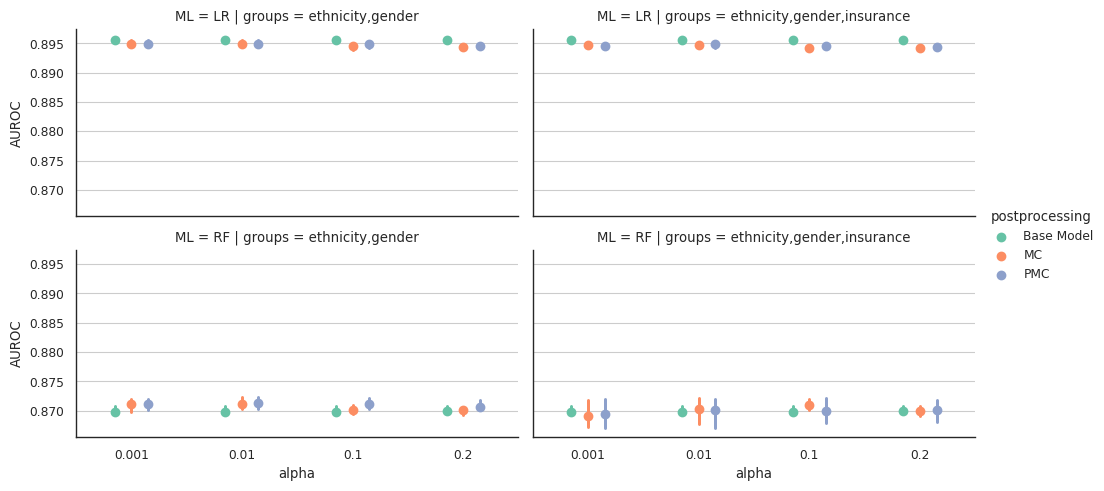

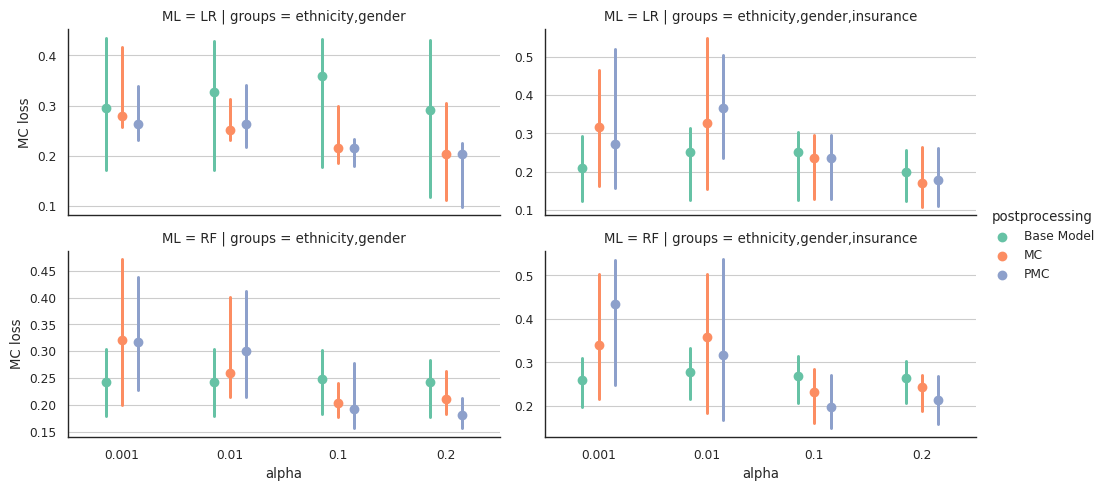

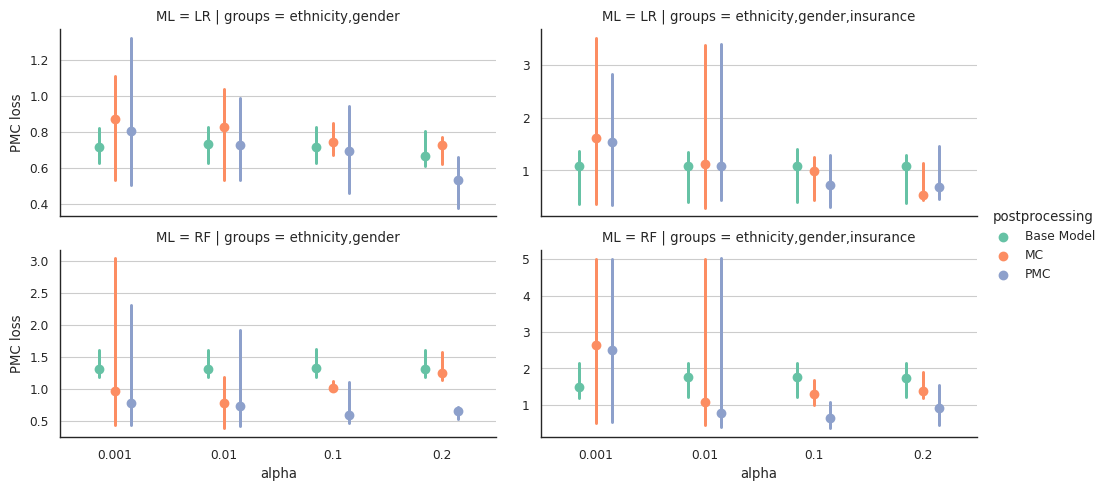

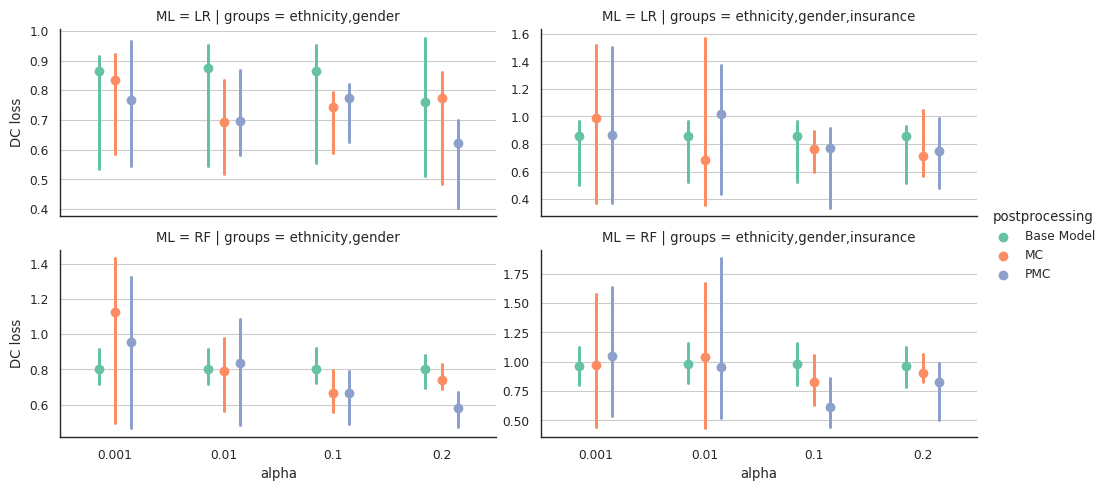

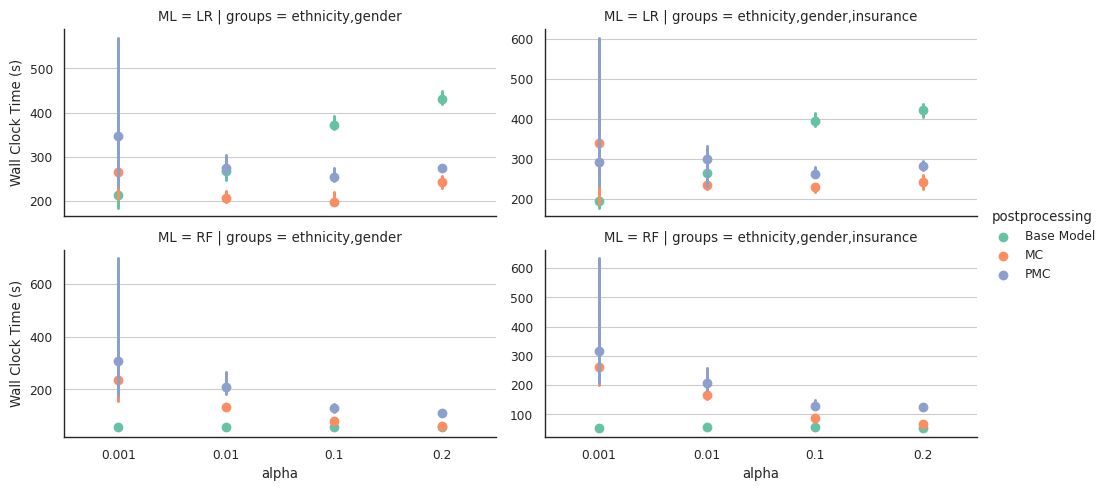

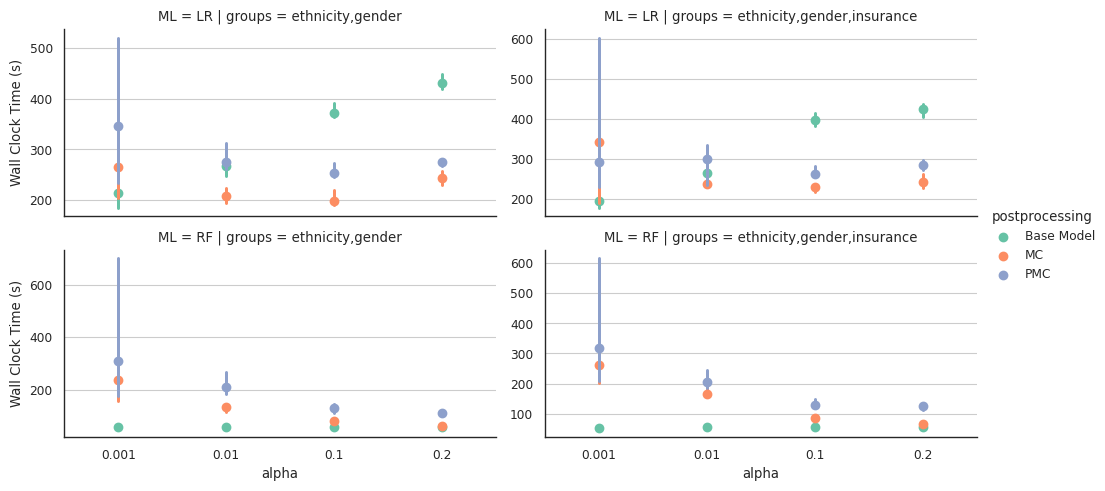

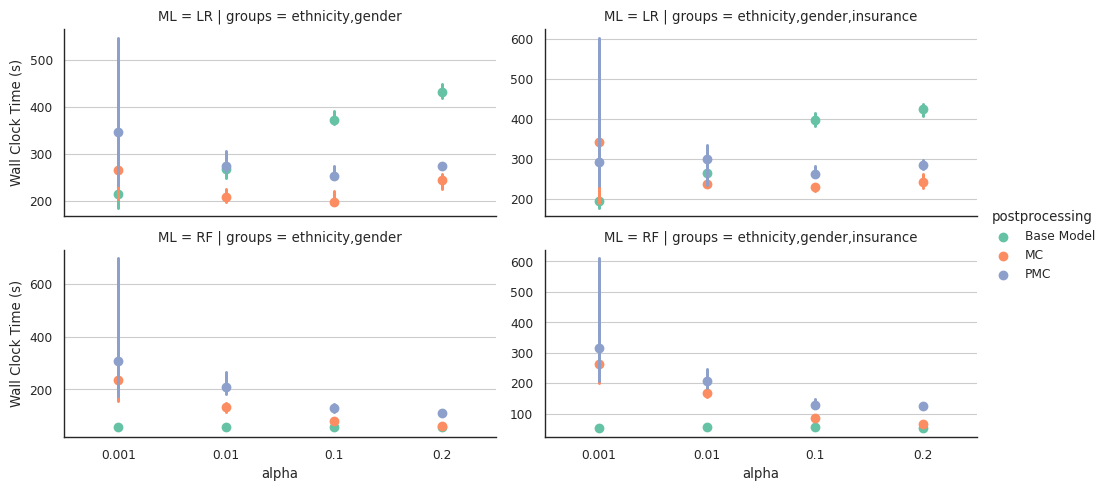

In [96]:
df_plt = df_results.copy()
df_plt = df_plt.loc[df_results.rho==0.1]
# df_plt = df_plt.loc[df_results.gamma==0.05]
# df_plt = df_plt.loc[df_results.n_bins==10]
# alpha_order=['0.2','0.1','0.05','0.01','0.001']
alpha_order = df_plt['alpha'].unique().sort()
post_order=['Base Model','MC','PMC']
ml_order=['LR','RF']
group_order=['ethnicity,gender','ethnicity,gender,insurance']
# df_plt = df_plt.loc[df_results.alpha.isin([0.001,0.01,0.1])]
# df_plt = df_plt.copy().loc[df_results.gamma==0.1]
# df_plt['alpha'] = df_plt['alpha'].astype(str)
df_plt = df_plt.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)
# row,col,hue=('rho','alpha','gamma') 
# row,col,hue=('ML','gamma','alpha') 
row,col,hue=('ML','groups','postprocessing') 

best_cfgs = []
for m in [nice_names[t] if t in nice_names else t for t in test_metrics+['Wall Clock Time (s)']]:
    losses = ['PMC loss', 'MC loss', 'DC loss'] if m in ['Wall Clock Time (s)'] else ['none']
    for loss in losses:
        print(m)
        hue_order=post_order
        print('----------------------------------------')
        g=sns.catplot(
            kind='point',
#             marker=hue,
            dodge=.3 if m not in ['Wall Clock Time (s)'] else False,
            join=False,
            estimator=np.median,
            data=df_plt,
#             x=m,
#             y='alpha',
            y=m,
            x='alpha',
#             order=alpha_order,
            hue=hue,
            hue_order=hue_order,
            row=row,
            row_order=ml_order,
            col=col,
            col_order=group_order,
            sharey=True if m=='AUROC' else False,
            aspect=2,
            height=2.5
        )
#         loss = 'PMC loss'
        for (ml,group),ax in g.axes_dict.items():
            ax.yaxis.grid(True)
            if m == 'Wall Clock Time (s)':
                yoff= 1
                xoff=-.1
                df = df_plt.copy().loc[(df_plt.ML==ml) & (df_plt.groups==group) & (df_plt.postprocessing.isin(hue_order))]
                scores = df.groupby(['alpha','postprocessing'])[loss].median().reset_index()
                best_idx = scores.groupby('postprocessing')[loss].idxmin()
    #             for p in hue_order: 
                for p, val in best_idx.iteritems():
                    s = scores.loc[val]
                    a = s['alpha'] 
                    score = s[loss]
                    try:
                        x = alpha_order.index(a)
                    except:
                        continue
                    y = boot_med(df.loc[(df.postprocessing==p) & (df.alpha==a)][m].values )
                    lossname=loss.split(' ')[0]
                    if p in ['MC','PMC']:
                        best_cfgs.append({
                            'metric': loss,
                            'Best Loss': score,
                             m:y,
                            'alpha':a,
                            'postprocessing':p,
                            'ml':ml,
                            'groups':group,
                        })
                    ax.annotate(f'{lossname}={score:.2f}', xy=(x+xoff,y+yoff), horizontalalignment='left',va='bottom',
                               rotation=5)
                ylim=ax.get_ylim()
                print(ylim)
                ax.set_ylim(bottom=ylim[0]-.1)

        plt.savefig((f"../overleaf/figs/catpoint_{m}_vs_alpha_row-{row}_col-{col}_hue-{hue}_annot-{loss}.pdf"
                    .replace(' ','-')
                    .replace('#','n')
                    ),
                    dpi=300, bbox_inches='tight' 
                   )

In [59]:
df_cfgs = pd.DataFrame.from_records(best_cfgs)
display(df_cfgs)

,metric,Best Loss,Wall Clock Time (s),alpha,postprocessing,ml,groups
0,PMC loss,0.617948,212.744326,0.01,MC,LR,"ethnicity,gender"
1,PMC loss,0.487733,273.213905,0.2,PMC,LR,"ethnicity,gender"
2,PMC loss,0.517330,235.589450,0.2,MC,LR,"ethnicity,gender,insurance"
3,PMC loss,0.498983,271.425787,0.2,PMC,LR,"ethnicity,gender,insurance"
4,PMC loss,0.761720,133.872719,0.01,MC,RF,"ethnicity,gender"
5,PMC loss,0.521582,127.759927,0.1,PMC,RF,"ethnicity,gender"
6,PMC loss,0.983172,160.335285,0.01,MC,RF,"ethnicity,gender,insurance"
7,PMC loss,0.631392,137.497560,0.1,PMC,RF,"ethnicity,gender,insurance"
8,MC loss,0.204228,239.626143,0.2,MC,LR,"ethnicity,gender"
9,MC loss,0.204228,273.118355,0.2,PMC,LR,"ethnicity,gender"


In [60]:
df_cfgs

,metric,Best Loss,Wall Clock Time (s),alpha,postprocessing,ml,groups
0,PMC loss,0.617948,212.744326,0.01,MC,LR,"ethnicity,gender"
1,PMC loss,0.487733,273.213905,0.2,PMC,LR,"ethnicity,gender"
2,PMC loss,0.517330,235.589450,0.2,MC,LR,"ethnicity,gender,insurance"
3,PMC loss,0.498983,271.425787,0.2,PMC,LR,"ethnicity,gender,insurance"
4,PMC loss,0.761720,133.872719,0.01,MC,RF,"ethnicity,gender"
5,PMC loss,0.521582,127.759927,0.1,PMC,RF,"ethnicity,gender"
6,PMC loss,0.983172,160.335285,0.01,MC,RF,"ethnicity,gender,insurance"
7,PMC loss,0.631392,137.497560,0.1,PMC,RF,"ethnicity,gender,insurance"
8,MC loss,0.204228,239.626143,0.2,MC,LR,"ethnicity,gender"
9,MC loss,0.204228,273.118355,0.2,PMC,LR,"ethnicity,gender"


In [61]:
df_cfgs

,metric,Best Loss,Wall Clock Time (s),alpha,postprocessing,ml,groups
0,PMC loss,0.617948,212.744326,0.01,MC,LR,"ethnicity,gender"
1,PMC loss,0.487733,273.213905,0.2,PMC,LR,"ethnicity,gender"
2,PMC loss,0.517330,235.589450,0.2,MC,LR,"ethnicity,gender,insurance"
3,PMC loss,0.498983,271.425787,0.2,PMC,LR,"ethnicity,gender,insurance"
4,PMC loss,0.761720,133.872719,0.01,MC,RF,"ethnicity,gender"
5,PMC loss,0.521582,127.759927,0.1,PMC,RF,"ethnicity,gender"
6,PMC loss,0.983172,160.335285,0.01,MC,RF,"ethnicity,gender,insurance"
7,PMC loss,0.631392,137.497560,0.1,PMC,RF,"ethnicity,gender,insurance"
8,MC loss,0.204228,239.626143,0.2,MC,LR,"ethnicity,gender"
9,MC loss,0.204228,273.118355,0.2,PMC,LR,"ethnicity,gender"


In [62]:
import itertools as it
order = []
for m,ml,p in it.product(['MC loss','PMC loss','DC loss'],
                  ml_order,
                  post_order[1:]
                 ):
    order.append((m,ml,p))

tbl = (df_cfgs
       .rename(columns={'metric':'Metric','ml':'ML','postprocessing':'Postprocessing'})
       .groupby(['Metric','ML','Postprocessing']) 
       [['Best Loss',
#          '# of Updates',
         'Wall Clock Time (s)']]
#        [['# of Updates','Wall Clock Time (s)']]
       .median()
#        .round(2) 
#        .astype(int)
       .sort_index(level='Metric',ascending=False)
       .loc[order]
)
tbl.to_latex('../overleaf/tbls/best_cfg_time.tex',
             multirow=True,
             formatters=[lambda x: f'{x:0.3f}',
#                          lambda x: f'{x:.0f}',
                         lambda x: f'{x:.1f}'
                        ] 
            )
display(tbl)

/tmp/ipykernel_3356572/63027821.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tbl.to_latex('../overleaf/tbls/best_cfg_time.tex',


Best Loss  Wall Clock Time (s)
Metric   ML Postprocessing                                
MC loss  LR MC               0.187124           237.555224
            PMC              0.190183           272.198106
         RF MC               0.214731            81.233627
            PMC              0.196640           120.846278
PMC loss LR MC               0.567639           224.166888
            PMC              0.493358           272.319846
         RF MC               0.872446           147.104002
            PMC              0.576487           132.628744
DC loss  LR MC               0.568070           343.344246
            PMC              0.538620           264.873680
         RF MC               0.624235           191.867787
            PMC              0.554748           125.845245

In [63]:
((378-52)/52
 + (504.69-188.07)/188.07
)/2

3.976376431034271

In [85]:
# pct difference btw RF / LR with and without PMC/MC

df_tbl = df_results.copy()
df_results
df = df_tbl.groupby('algorithm')[test_metrics].apply(np.mean)

for metric in test_metrics:
    print(metric)
    for m in ['LR','RF']:
#         print('\t',m)
        for post in ['MC','PMC']:
#             print('\t\t',post)
            a = df.loc[m,metric] 
            b = df.loc[f'{m}+{post}',metric]
            pct= 100*((a-b)/a)
            print('\t\t\t',m,post,'% diff:',round(pct,2))
        a = df.loc[f'{m}+MC',metric] 
        b = df.loc[f'{m}+PMC',metric]
        pct= 100*((a-b)/a)
        print('\t\t\t',m,'MC-PMC','% diff:',round(pct,2))
    print('---')

KeyError: "Columns not found: 'AUROC', 'DC loss', 'PMC loss', 'MC loss'"

AUROC
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR vs. LR+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.720e-83 U_stat=6.626e+05
LR+MC vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.034e-01 U_stat=4.102e+05
RF vs. RF+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.930e-06 U_stat=3.838e+05
RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=4.279e+05
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.037e-68 U_stat=6.411e+05
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.555e-09 U_stat=3.688e+05
........................................
MC loss
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e

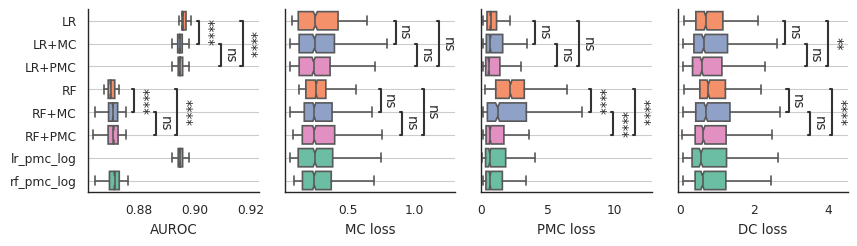

In [66]:
make_plot(
    df_results, kind='box', 
    plot_kwargs=dict(saturation=0.9,
                     palette='Set2'
                    ),
    facet_kwargs=dict(aspect=0.85)
)

In [69]:
# loss versus running time 

In [70]:
# sns.set_style('white')
# df_plt = df_results.copy()
# df_plt = df_plt.loc[df_results.rho==0.01]
# df_plt = df_plt.loc[df_results.gamma==0.1]
# df_plt = df_plt.loc[df_results.n_bins==10]
# # df_plt = df_plt.loc[df_results.alpha.isin([0.001,0.01,0.1])]
# # df_plt = df_plt.copy().loc[df_results.gamma==0.1]
# df_plt['alpha'] = df_plt['alpha'].astype(str)
# df_plt = df_plt.rename(columns=nice_names) 
# for level,nicety in nice_levels.items():
#     df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)
# # row,col,hue=('rho','alpha','gamma') 
# # row,col,hue=('ml_name','gamma','alpha') 
# row,col,hue=('ML','groups','postprocessing') 
# # row,col,hue=('alpha','gamma','postprocessing') 
# # row,col,hue=('gamma','rho','postprocessing') 
# for m in [nice_names[t] if t in nice_names else t for t in test_metrics]:
#     # m = 'Wall Clock Time (s)'
#     print(m)
#     print('----------------------------------------')
#     g=sns.relplot(
#     #         kind='box',
#         kind='scatter',
#         data=df_plt,
#         x='Wall Clock Time (s)',
#         y=m,
#         hue=hue,
#         style='alpha',
#         hue_order=['Base Model','MC','PMC'],
#         row=row,
#         row_order=['LR','RF'],
#         col=col,
# #         facet_kws=dict(sharey=False),
#         aspect=1,
#         height=4
#     )
#     # g.set(grid=True,axis='y')
#     for ax in g.axes.flat:
#         ax.yaxis.grid(True)
#     #         ax.set_ylabel('')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

RF_MC vs. RF_PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.426e+05
RF_Base Model vs. RF_MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.736e-05 U_stat=2.153e+05
LR_Base Model vs. LR_MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.045e-62 U_stat=3.722e+05
LR_MC vs. LR_PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.611e-02 U_stat=2.275e+05
RF_Base Model vs. RF_PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.047e-05 U_stat=2.101e+05
LR_Base Model vs. LR_PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.084e-49 U_stat=3.577e+05
AUROC
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
 

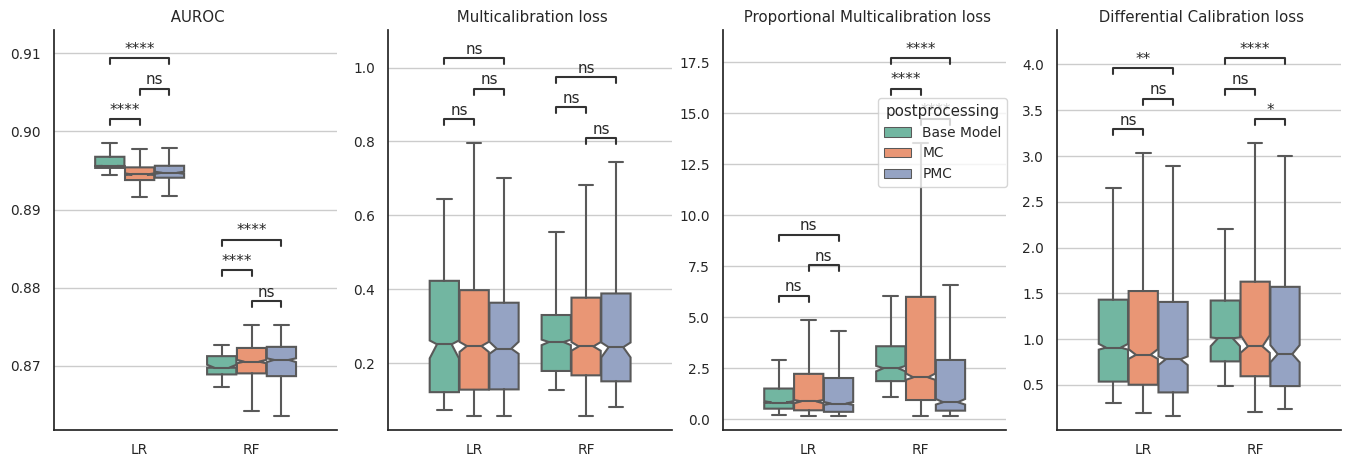

In [82]:

# df_plt = df_results.copy()
df_plt = df_results.loc[df_results.rho < 0.5]
df_plt = df_plt.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)
    
df_plt['ML'] = df_plt['ML'].apply(lambda x: x.upper()) 
df_plt = (df_plt
          .melt(id_vars = ['algorithm',
                           'ML',
                           'postprocessing',
                           'alpha',
                           'gamma',
                           'rho',
                           'n_bins',
                           ]
               )
         )
df_plt = df_plt.loc[df_plt.variable.isin(test_metrics)]
df_plt['value'] = df_plt['value'].astype(float)

shared_args = dict(
    x='ML',
    y='value',
    hue='postprocessing',
    hue_order=['Base Model','MC','PMC']
)
g = sns.catplot(
# ######################################## 
#         # box options
    kind='box',
    notch=True,
    showfliers=False,
    bootstrap=1000,
# ######################################## 
#         # point options
#     kind='point',
#     dodge=0.25,
#     join=False,
#     estimator=np.median,
#     errorbar=('pi',95),
# ######################################## 
    data=df_plt,
    col='variable',
    **shared_args,
    sharey=False,
    aspect=.7,
#     height=3,
#     palette=sns.color_palette('Set3')
)
sns.move_legend(g, [0.65,0.6], frameon=True)
pairs = [
    (('RF','Base Model'),('RF','MC')),
    (('RF','Base Model'),('RF','PMC')),
    (('RF','MC'),('RF','PMC')),
    (('LR','Base Model'),('LR','MC')),
    (('LR','Base Model'),('LR','PMC')),
    (('LR','MC'),('LR','PMC')),
]
for k,ax in g.axes_dict.items():
    df_ax = df_plt.loc[df_plt.variable==k]
#     import ipdb 
#     ipdb.set_trace()
    annotator = Annotator(
        ax,
        pairs, 
        data=df_ax, 
        **shared_args,
    )
    annotator.configure(test='Mann-Whitney', 
                        comparisons_correction="Bonferroni",
                        text_format='star', 
                        loc='inside')
    annotator.apply_and_annotate()
    
    print(k)
    ax.yaxis.grid(True)
    ax.set_xlabel('Base ML Method')
    title = (ax.get_title()
             .split('=')[-1]
             .replace('PMC','Proportional Multicalibration')
             .replace('MC','Multicalibration')
             .replace('DC','Differential Calibration')
            )
    ax.set_title(title)
        
    ax.set_ylabel('')
    ax.set_xlabel('')
        
save(g,'box_AUROC_MC_PMC_DC') 

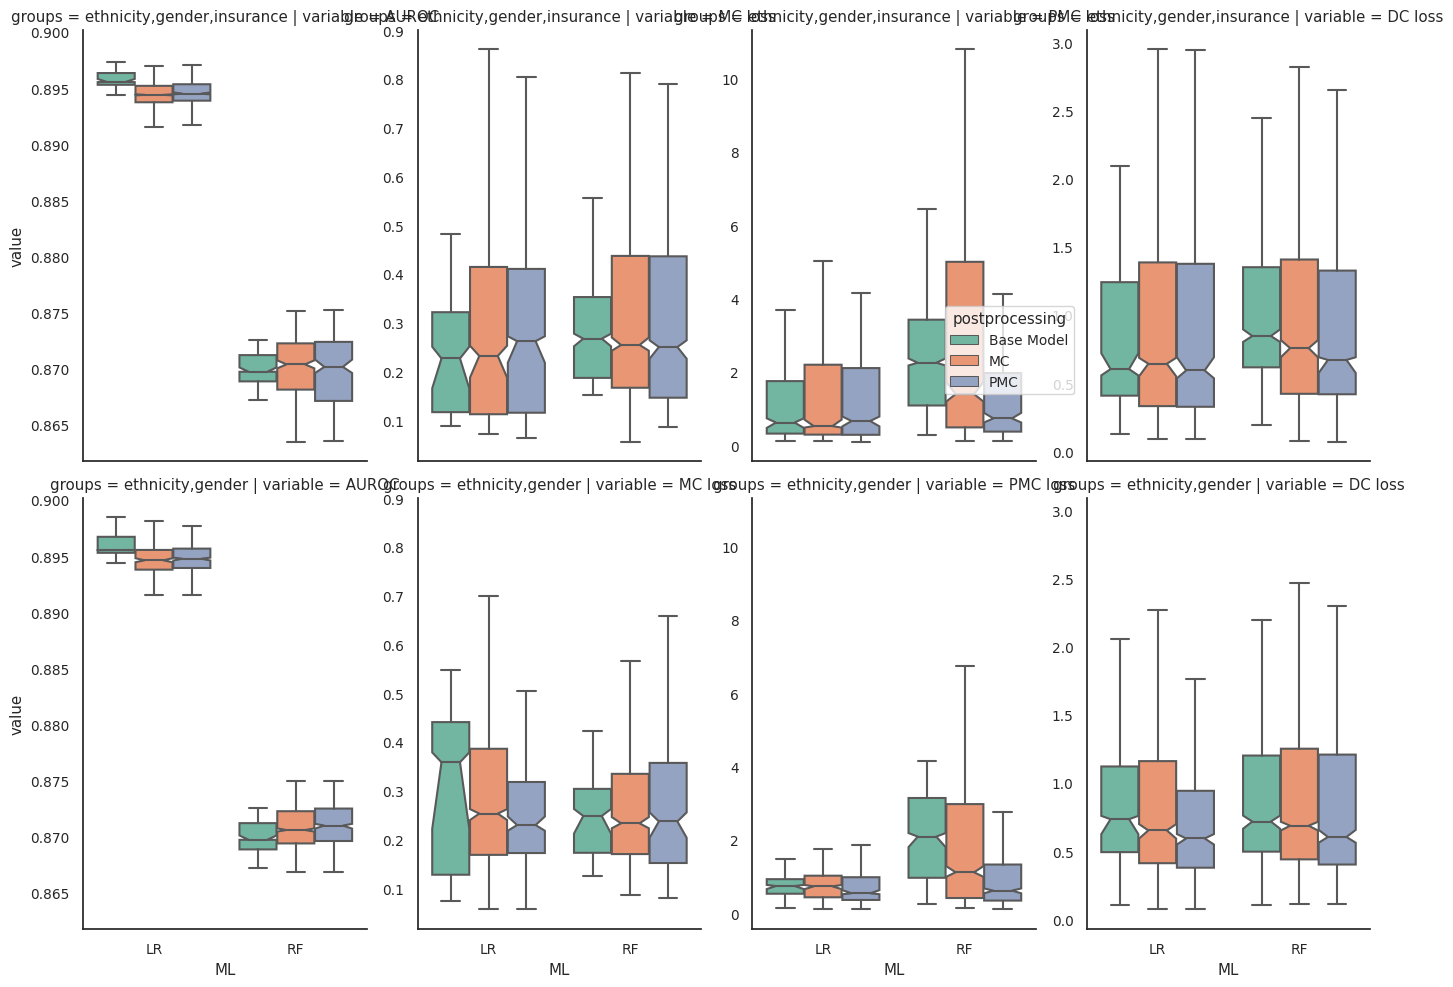

In [84]:
sns.set_style('white')
sns.set_theme(style='white',
              font_scale=0.9,
              palette='Set2'
             )
df_plt = df_results.copy()
df_plt = df_plt.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)
    
df_plt['ML'] = df_plt['ML'].apply(lambda x: x.upper()) 
df_plt = (df_plt
          .melt(id_vars = ['algorithm',
                           'ML',
                           'postprocessing',
                           'alpha',
                           'gamma',
                           'rho',
                           'n_bins',
                           'groups'
                           ]
               )
         )
df_plt = df_plt.loc[df_plt.variable.isin(test_metrics)]
df_plt['value'] = df_plt['value'].astype(float)

shared_args = dict(
    x='ML',
    y='value',
    hue='postprocessing',
    hue_order=['Base Model','MC','PMC']
)
g = sns.catplot(
# ######################################## 
#         # box options
    kind='box',
    notch=True,
    showfliers=False,
    bootstrap=1000,
# ######################################## 
#         # point options
#     kind='point',
#     dodge=0.25,
#     join=False,
#     estimator=np.median,
#     errorbar=('pi',95),
# ######################################## 
    data=df_plt,
    col='variable',
    **shared_args,
    sharey='col',
    aspect=.7,
    row='groups'
#     height=3,
#     palette=sns.color_palette('Set3')
)
sns.move_legend(g, [0.65,0.6], frameon=True)
pairs = [
    (('RF','Base Model'),('RF','MC')),
    (('RF','Base Model'),('RF','PMC')),
    (('RF','MC'),('RF','PMC')),
    (('LR','Base Model'),('LR','MC')),
    (('LR','Base Model'),('LR','PMC')),
    (('LR','MC'),('LR','PMC')),
]
# for k,ax in g.axes_dict.items():
#     df_ax = df_plt.loc[df_plt.variable==k]
# #     import ipdb 
# #     ipdb.set_trace()
#     annotator = Annotator(
#         ax,
#         pairs, 
#         data=df_ax, 
#         **shared_args,
#     )
#     annotator.configure(test='Mann-Whitney', 
#                         comparisons_correction="Bonferroni",
#                         text_format='star', 
#                         loc='inside')
#     annotator.apply_and_annotate()
    
#     print(k)
#     ax.yaxis.grid(True)
#     ax.set_xlabel('Base ML Method')
#     title = (ax.get_title()
#              .split('=')[-1]
#              .replace('PMC','Proportional Multicalibration')
#              .replace('MC','Multicalibration')
#              .replace('DC','Differential Calibration')
#             )
#     ax.set_title(title)
        
#     ax.set_ylabel('')
#     ax.set_xlabel('')
        
save(g,'box_AUROC_MC_PMC_DC') 